### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
%matplotlib  inline

In [2]:
df = pd.read_csv("C:\\Users\\thiru\\OneDrive\\Documents\\Guvi Final project\\Customer Conversion Prediction - Customer Conversion Prediction.csv")
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
dur,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
num_calls,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0


In [5]:
df.shape

(45211, 11)

In [6]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
for col in df.columns[0:]:
    print(col,":",len(df[col].unique()),"Labels")
    

age : 77 Labels
job : 12 Labels
marital : 3 Labels
education_qual : 4 Labels
call_type : 3 Labels
day : 31 Labels
mon : 12 Labels
dur : 1573 Labels
num_calls : 48 Labels
prev_outcome : 4 Labels
y : 2 Labels


In [8]:
df["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [9]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

### There is no null value in the data set

In [10]:
cat_columns = [x for x in df.columns if df[x].dtype ==np.dtype("object")]
num_columns = [x for x in df.columns if df[x].dtype ==np.dtype("int64")]

In [11]:
cat_columns

['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome', 'y']

In [12]:
num_columns

['age', 'day', 'dur', 'num_calls']

In [13]:
print("Total categorical columns: ",len(cat_columns))

Total categorical columns:  7


In [14]:
print("Total numerical columns: ", len(num_columns))

Total numerical columns:  4


In [15]:
a = pd.DataFrame(df[col].value_counts().index,columns=["col"])

In [16]:
a

,col
0,no
1,yes


In [17]:
b = pd.DataFrame(df[col].value_counts().values, columns = ['counts'])
b

,counts
0,39922
1,5289


In [18]:
df[col].value_counts().values

array([39922,  5289], dtype=int64)

In [19]:
unique_data = pd.concat([a,b], axis = 1)
unique_data

,col,counts
0,no,39922
1,yes,5289


In [20]:
z = df["job"].unique()
z

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [21]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

### Getting unique values from the dataset

In [22]:
def get_uniques(df,col):
    index_list = pd.DataFrame(df[col].value_counts().index,columns=[col]);
    value_list = pd.DataFrame(df[col].value_counts().values,columns=["counts"])
    unique_data = pd.concat([index_list,value_list],axis=1)
    unique_data["percentage"]= round(unique_data["counts"]/sum(unique_data["counts"])*100,2)
    unique_data.sort_values(by="percentage",ascending=False)
    print('\n- {} Feature :\n'.format(col.upper()))
    for unit in range(unique_data.shape[0]):
         print(f'{unique_data[col][unit]:10} : {unique_data.percentage[unit]}')
    

In [23]:
for categorical in cat_columns:
    get_uniques(df,categorical)
    


- JOB Feature :

blue-collar : 21.53
management : 20.92
technician : 16.8
admin.     : 11.44
services   : 9.19
retired    : 5.01
self-employed : 3.49
entrepreneur : 3.29
unemployed : 2.88
housemaid  : 2.74
student    : 2.07
unknown    : 0.64

- MARITAL Feature :

married    : 60.19
single     : 28.29
divorced   : 11.52

- EDUCATION_QUAL Feature :

secondary  : 51.32
tertiary   : 29.42
primary    : 15.15
unknown    : 4.11

- CALL_TYPE Feature :

cellular   : 64.77
unknown    : 28.8
telephone  : 6.43

- MON Feature :

may        : 30.45
jul        : 15.25
aug        : 13.82
jun        : 11.81
nov        : 8.78
apr        : 6.49
feb        : 5.86
jan        : 3.1
oct        : 1.63
sep        : 1.28
mar        : 1.06
dec        : 0.47

- PREV_OUTCOME Feature :

unknown    : 81.75
failure    : 10.84
other      : 4.07
success    : 3.34

- Y Feature :

no         : 88.3
yes        : 11.7


### Changing the Y feature into numerical column

In [24]:
df["y"] = df["y"].map({"yes":1,"no":0})

In [25]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 3.8+ MB


In [27]:
df.describe()

,age,day,dur,num_calls,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841,0.116985
std,10.618762,8.322476,257.527812,3.098021,0.321406
min,18.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,31.000000,4918.000000,63.000000,1.000000


### Checking for Categorical value

In [28]:
df.describe(include=['O'])

,job,marital,education_qual,call_type,mon,prev_outcome
count,45211,45211,45211,45211,45211,45211
unique,12,3,4,3,12,4
top,blue-collar,married,secondary,cellular,may,unknown
freq,9732,27214,23202,29285,13766,36959


In [29]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0


In [30]:
df_dummies = [pd.get_dummies(df["job"],prefix="job",prefix_sep=":"),
              pd.get_dummies(df["marital"],prefix = "marital",prefix_sep=":"),
              pd.get_dummies(df["education_qual"],prefix = "education_qual",prefix_sep=":"),
              pd.get_dummies(df["call_type"],prefix = "call_type",prefix_sep=":"),
              pd.get_dummies(df["mon"],prefix = "mon",prefix_sep=":"),
              pd.get_dummies(df["prev_outcome"],prefix = "marital",prefix_sep=":")            
             ]

In [31]:
df_dummies = pd.concat(df_dummies,axis=1)

In [32]:
df = pd.concat([df,df_dummies],axis=1)

In [33]:
df.shape

(45211, 49)

In [34]:
df.columns.values

array(['age', 'job', 'marital', 'education_qual', 'call_type', 'day',
       'mon', 'dur', 'num_calls', 'prev_outcome', 'y', 'job:admin.',
       'job:blue-collar', 'job:entrepreneur', 'job:housemaid',
       'job:management', 'job:retired', 'job:self-employed',
       'job:services', 'job:student', 'job:technician', 'job:unemployed',
       'job:unknown', 'marital:divorced', 'marital:married',
       'marital:single', 'education_qual:primary',
       'education_qual:secondary', 'education_qual:tertiary',
       'education_qual:unknown', 'call_type:cellular',
       'call_type:telephone', 'call_type:unknown', 'mon:apr', 'mon:aug',
       'mon:dec', 'mon:feb', 'mon:jan', 'mon:jul', 'mon:jun', 'mon:mar',
       'mon:may', 'mon:nov', 'mon:oct', 'mon:sep', 'marital:failure',
       'marital:other', 'marital:success', 'marital:unknown'],
      dtype=object)

In [35]:
len(df.columns.values)

49

### Splitting Data

In [36]:
X = df.drop('y',axis=1);
Y = df['y']

In [37]:
train_test_split(X,Y)

[       age          job   marital education_qual call_type  day  mon  dur  \
 37456   42   management  divorced       tertiary  cellular   13  may  222   
 18852   60      retired   married      secondary  cellular    4  aug  160   
 33618   35  blue-collar   married      secondary  cellular   20  apr   93   
 13211   60      retired  divorced      secondary  cellular    8  jul   96   
 41711   33   management    single       tertiary  cellular    7  oct  201   
 ...    ...          ...       ...            ...       ...  ...  ...  ...   
 21076   30   management    single       tertiary  cellular   14  aug  112   
 25391   46   management    single      secondary  cellular   18  nov  437   
 21680   34   management    single       tertiary  cellular   19  aug  181   
 10332   57  blue-collar   married        unknown   unknown   12  jun   98   
 16158   26     services    single       tertiary  cellular   22  jul  156   
 
        num_calls prev_outcome  ...  mon:jun  mon:mar  mon:may

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [39]:
X_train.shape

(36168, 48)

In [40]:
X_test.shape

(9043, 48)

In [41]:
y_train.shape

(36168,)

In [42]:
y_test.shape

(9043,)

In [43]:
y_train

3344     0
17965    0
18299    0
10221    0
32192    1
        ..
11284    1
44732    0
38158    0
860      0
15795    0
Name: y, Length: 36168, dtype: int64

### Data Preprocessing

In [44]:
X_prep= X_train
y_prep = y_train

In [45]:
def importance_calc(df,feature,target_train):
    df = pd.concat([df[feature],target_train],axis=1);
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(), df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], "n_obs","prop_good"]
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['feature_importance'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['feature_importance'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_impo'] = df['feature_importance'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['feature_importance']
    df['IV'] = df['IV'].sum();
    return df

### Marital Feature

In [46]:
df_temp = importance_calc(df,"marital",y_prep)
df_temp

,marital,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,feature_importance,diff_prop_good,diff_impo,IV
0,married,21804,0.100578,0.602853,2193.0,19611.0,0.522392,0.613419,-0.160630,NaN,NaN,0.038845
1,divorced,4143,0.119720,0.114549,496.0,3647.0,0.118152,0.114076,0.035105,0.019142,0.195736,0.038845
2,single,10221,0.147637,0.282598,1509.0,8712.0,0.359457,0.272505,0.276936,0.027917,0.241830,0.038845


In [47]:
def plot_feature_value_importance(df_feature_importance, x_axis_labels=0):
    x =np.array(df_feature_importance.iloc[:,0].apply(str));
    y=df_feature_importance["feature_importance"]
    plt.figure(figsize=(20,8))
    plt.plot(x,y,marker="*", linestyle="-",color="b")
    plt.xlabel(df_feature_importance.columns[0])
    plt.ylabel("Feature_value_importance")
    plt.title(str("Feature_value_importance in  "+ df_feature_importance.columns[0]))
    plt.xticks(rotation=x_axis_labels );

### Marital Feature values visualization 

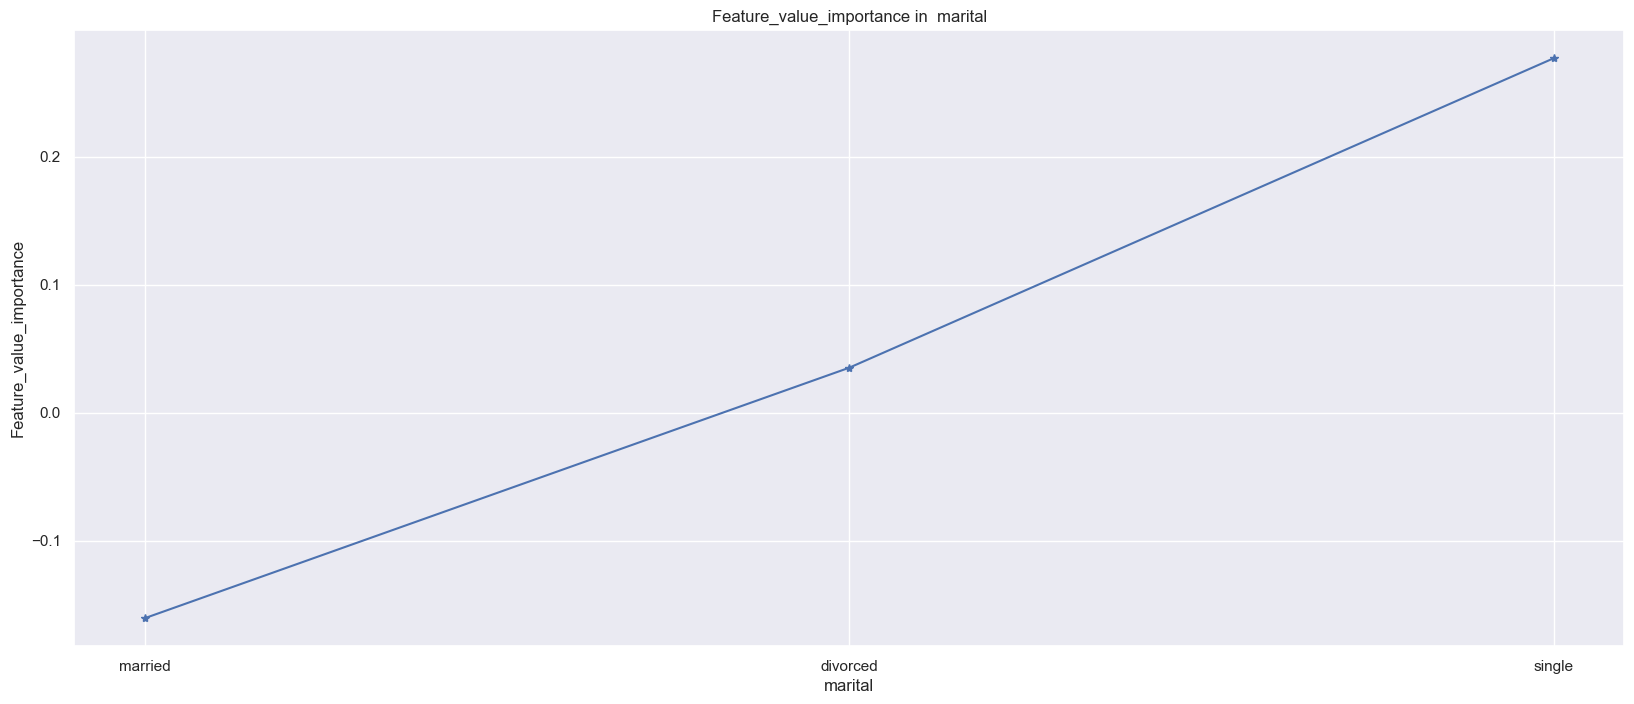

In [48]:
plot_feature_value_importance(df_temp)

### Job Feature values visualization 

In [49]:
df_temp=importance_calc(df,"job",y_prep)
df_temp.head()

,job,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,feature_importance,diff_prop_good,diff_impo,IV
0,blue-collar,7806,0.072252,0.215826,564.0,7242.0,0.134350,0.226525,-0.522409,NaN,NaN,0.147416
1,entrepreneur,1178,0.086587,0.032570,102.0,1076.0,0.024297,0.033657,-0.325843,0.014335,0.196566,0.147416
2,services,3350,0.090746,0.092623,304.0,3046.0,0.072415,0.095277,-0.274367,0.004159,0.051476,0.147416
3,housemaid,1002,0.093812,0.027704,94.0,908.0,0.022392,0.028402,-0.237760,0.003066,0.036607,0.147416
4,technician,6096,0.108760,0.168547,663.0,5433.0,0.157932,0.169941,-0.073282,0.014947,0.164478,0.147416


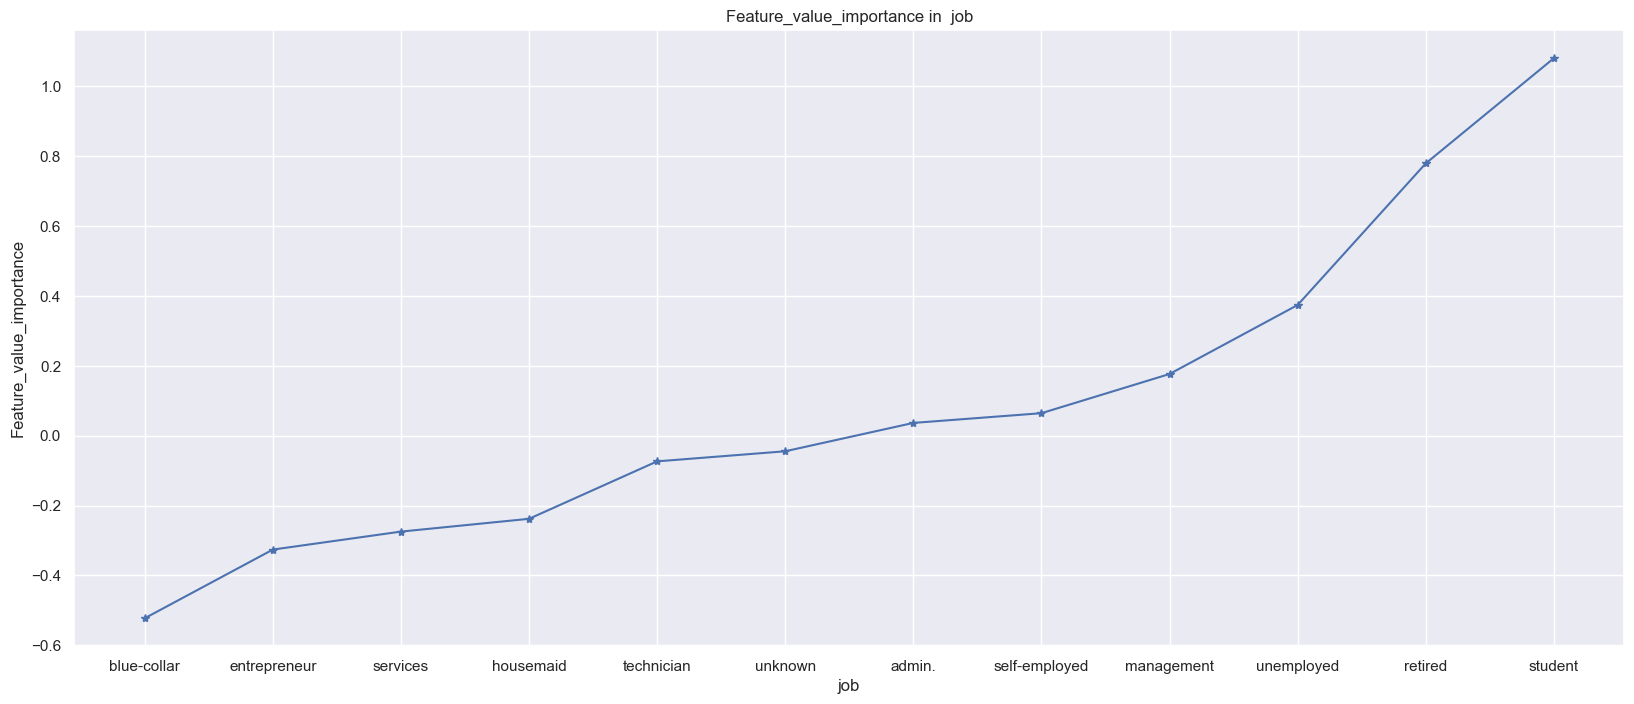

In [50]:
plot_feature_value_importance(df_temp)

### Education feature

In [51]:
df_temp=importance_calc(df,"education_qual",y_prep)
df_temp.head()

,education_qual,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,feature_importance,diff_prop_good,diff_impo,IV
0,primary,5476,0.086377,0.151405,473.0,5003.0,0.112673,0.156490,-0.328508,NaN,NaN,0.047672
1,secondary,18670,0.105303,0.516202,1966.0,16704.0,0.468318,0.522490,-0.109457,0.018926,0.219050,0.047672
2,unknown,1483,0.127444,0.041003,189.0,1294.0,0.045021,0.040475,0.106443,0.022142,0.215901,0.047672
3,tertiary,10539,0.148970,0.291390,1570.0,8969.0,0.373988,0.280544,0.287491,0.021526,0.181048,0.047672


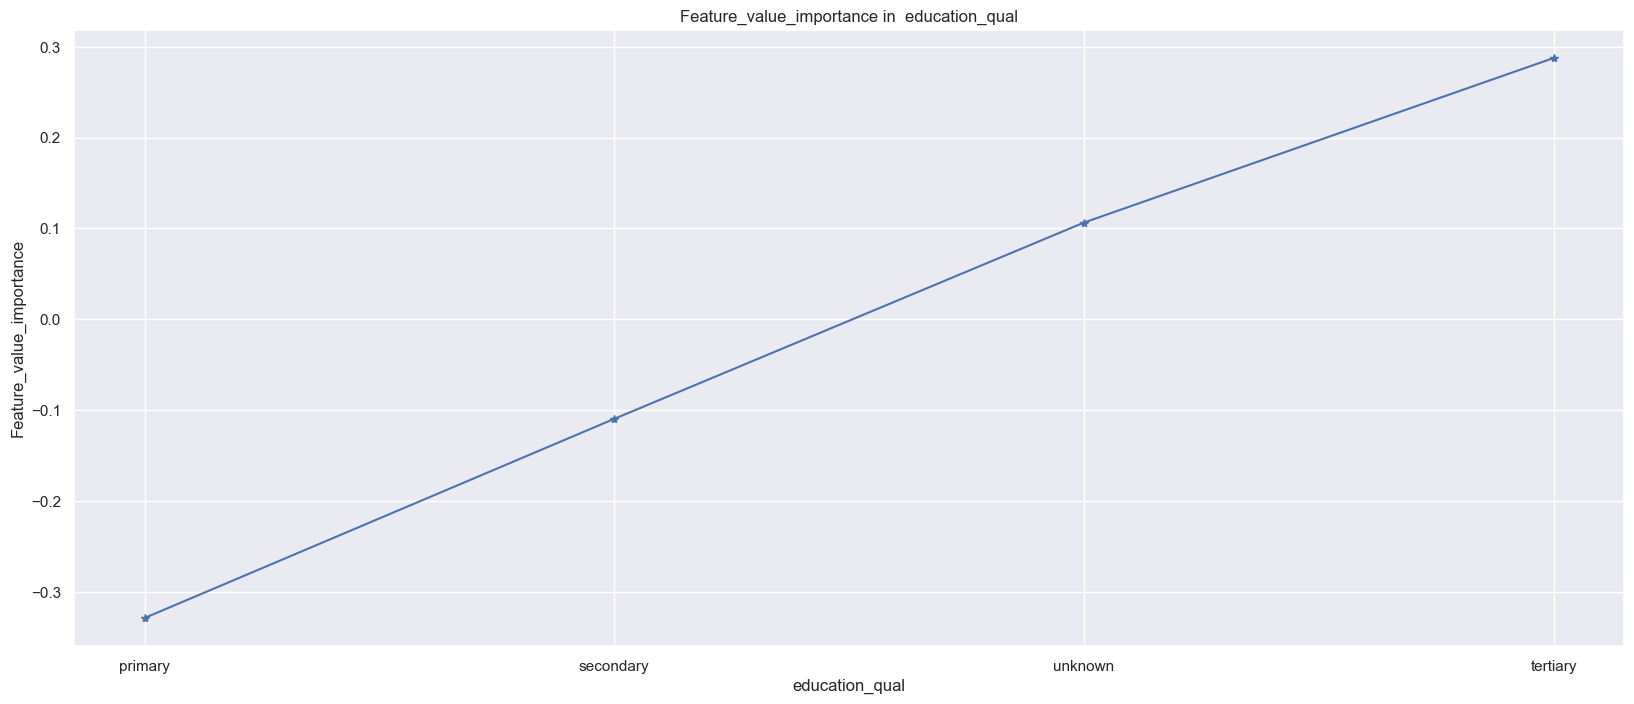

In [52]:
plot_feature_value_importance(df_temp)

### Month Feature

In [53]:
df_temp=importance_calc(df,"mon",y_prep)
df_temp.head()

,mon,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,feature_importance,diff_prop_good,diff_impo,IV
0,may,10963,0.065219,0.303113,715.0,10248.0,0.170319,0.320551,-0.632366,NaN,NaN,0.447096
1,jul,5537,0.091927,0.153091,509.0,5028.0,0.121248,0.157272,-0.260140,0.026708,0.372226,0.447096
2,jan,1135,0.098678,0.031381,112.0,1023.0,0.026679,0.031999,-0.181806,0.006751,0.078334,0.447096
3,jun,4318,0.098888,0.119387,427.0,3891.0,0.101715,0.121708,-0.179448,0.000210,0.002358,0.447096
4,nov,3173,0.101481,0.087729,322.0,2851.0,0.076703,0.089177,-0.150684,0.002593,0.028764,0.447096


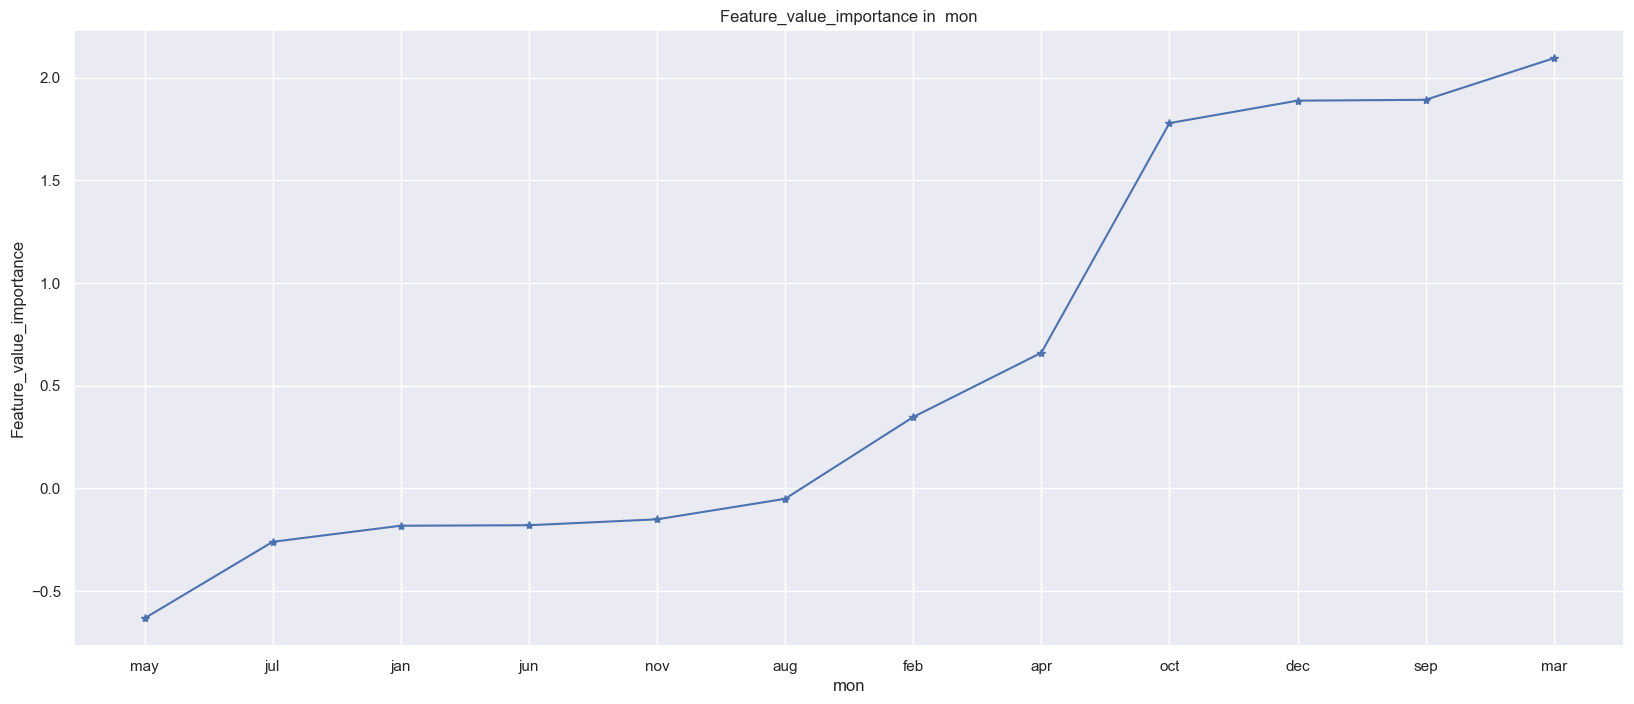

In [54]:
plot_feature_value_importance(df_temp)

### prev_outcome Feature

In [55]:
df_temp=importance_calc(df,"prev_outcome",y_prep)
df_temp.head()

,prev_outcome,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,feature_importance,diff_prop_good,diff_impo,IV
0,unknown,29560,0.090392,0.817297,2672.0,26888.0,0.636494,0.841038,-0.278663,NaN,NaN,0.515189
1,failure,3901,0.126891,0.107858,495.0,3406.0,0.117913,0.106537,0.101454,0.036498,0.380117,0.515189
2,other,1497,0.170341,0.041390,255.0,1242.0,0.060743,0.038849,0.446975,0.043450,0.345521,0.515189
3,success,1210,0.641322,0.033455,776.0,434.0,0.184850,0.013575,2.611298,0.470982,2.164323,0.515189


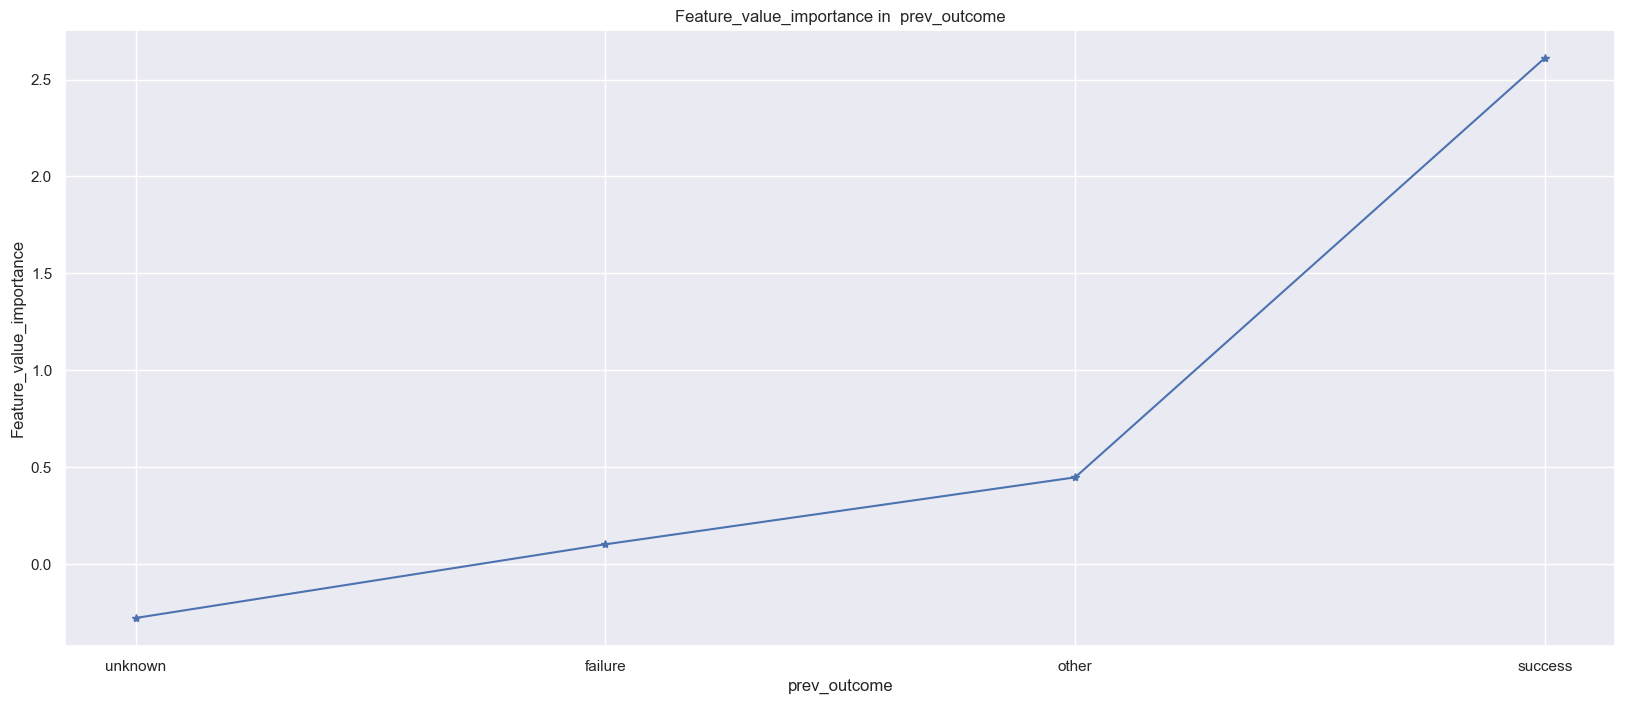

In [56]:
plot_feature_value_importance(df_temp)

### Data Preprocessing  for numerical variable

In [57]:
def importance_numeric_cal(df,feature,target_train):
    df = pd.concat([df[feature],target_train],axis=1);
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(), df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0], "n_obs","prop_good"]
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['feature_importance'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['feature_importance'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_impo'] = df['feature_importance'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['feature_importance']
    df['IV'] = df['IV'].sum();
    return df

In [58]:
df_temp=importance_numeric_cal(df,"age",y_prep)
df_temp.head()


C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,feature_importance,diff_prop_good,diff_impo,IV
0,94,1,0.000000,0.000028,0.0,1.0,0.000000,0.000031,-inf,NaN,NaN,inf
1,89,3,0.000000,0.000083,0.0,3.0,0.000000,0.000094,-inf,0.000000,NaN,inf
2,88,2,0.000000,0.000055,0.0,2.0,0.000000,0.000063,-inf,0.000000,NaN,inf
3,87,1,0.000000,0.000028,0.0,1.0,0.000000,0.000031,-inf,0.000000,NaN,inf
4,56,617,0.076175,0.017059,47.0,570.0,0.011196,0.017829,-0.465299,0.076175,inf,inf


In [59]:
df_temp.shape

(77, 12)

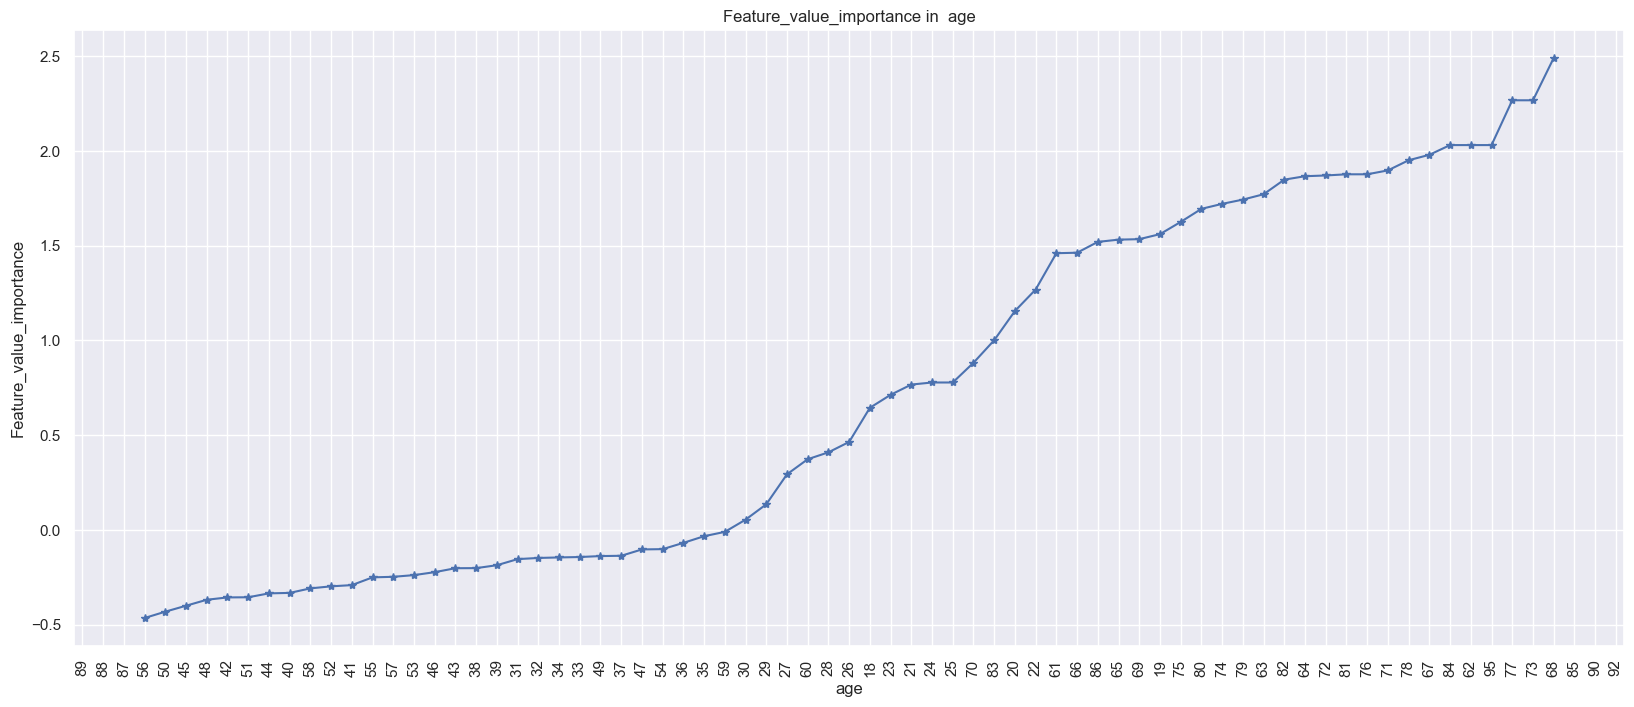

In [60]:
plot_feature_value_importance(df_temp,90)

In [61]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'job:admin.',
       'job:blue-collar', 'job:entrepreneur', 'job:housemaid',
       'job:management', 'job:retired', 'job:self-employed', 'job:services',
       'job:student', 'job:technician', 'job:unemployed', 'job:unknown',
       'marital:divorced', 'marital:married', 'marital:single',
       'education_qual:primary', 'education_qual:secondary',
       'education_qual:tertiary', 'education_qual:unknown',
       'call_type:cellular', 'call_type:telephone', 'call_type:unknown',
       'mon:apr', 'mon:aug', 'mon:dec', 'mon:feb', 'mon:jan', 'mon:jul',
       'mon:jun', 'mon:mar', 'mon:may', 'mon:nov', 'mon:oct', 'mon:sep',
       'marital:failure', 'marital:other', 'marital:success',
       'marital:unknown'],
      dtype='object')

In [62]:
num_columns

['age', 'day', 'dur', 'num_calls']

### Target Column visualization

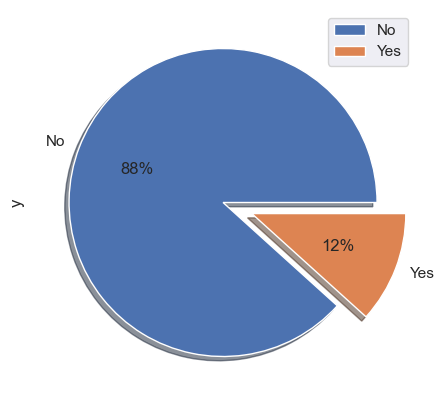

In [63]:
plt.figure(figsize=(8,5))
labels = ['No','Yes']
df['y'].value_counts().plot.pie(shadow=True,
                                labels=labels,
                                autopct='%0.f%%',
                                explode = [0.0,0.2])
plt.legend()
plt.show()

In [64]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,...,mon:jun,mon:mar,mon:may,mon:nov,mon:oct,mon:sep,marital:failure,marital:other,marital:success,marital:unknown
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,...,0,0,1,0,0,0,0,0,0,1
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,...,0,0,1,0,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,...,0,0,1,0,0,0,0,0,0,1
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,...,0,0,1,0,0,0,0,0,0,1
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,...,0,0,1,0,0,0,0,0,0,1


<Figure size 7500x6000 with 0 Axes>

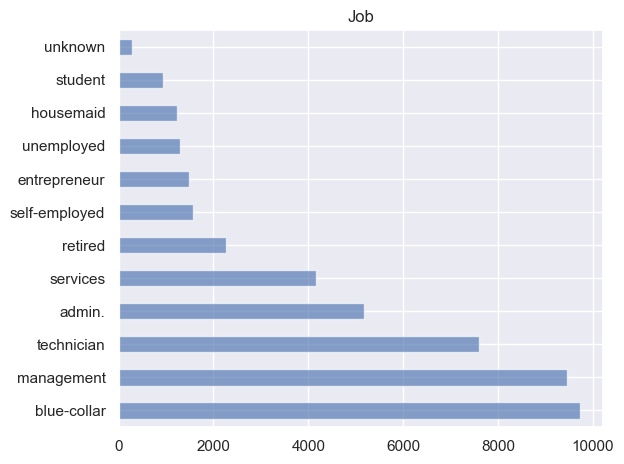

In [65]:
plt.figure(figsize=(5,4),dpi=1500);
fig,ax =plt.subplots()
df.job.value_counts().plot(kind="barh",alpha=0.65)
plt.title("Job");
plt.tight_layout();
plt.show()

### Most common jobs among the yes clients & the percentage of them

In [67]:
df[["job","y"]].groupby(["job"],as_index=True).mean().sort_values(
    by="y",ascending=False).style.background_gradient(axis=None,low=1.0)

,y
job,
student,0.286780
retired,0.227915
unemployed,0.155027
management,0.137556
admin.,0.122027
self-employed,0.118429
unknown,0.118056
technician,0.110570
services,0.088830


### This clearly shows that the students have more interested to subscribe as an client, While Blue-collar is the least interested among all the jobs

In [77]:
pd.crosstab(df['job'],df['y'], margins=True, margins_name='Total').style.background_gradient(axis=None
                                                                                  , low=0.75, high=1.0)

y,0,1,Total
job,,,
admin.,4540,631,5171
blue-collar,9024,708,9732
entrepreneur,1364,123,1487
housemaid,1131,109,1240
management,8157,1301,9458
retired,1748,516,2264
self-employed,1392,187,1579
services,3785,369,4154
student,669,269,938


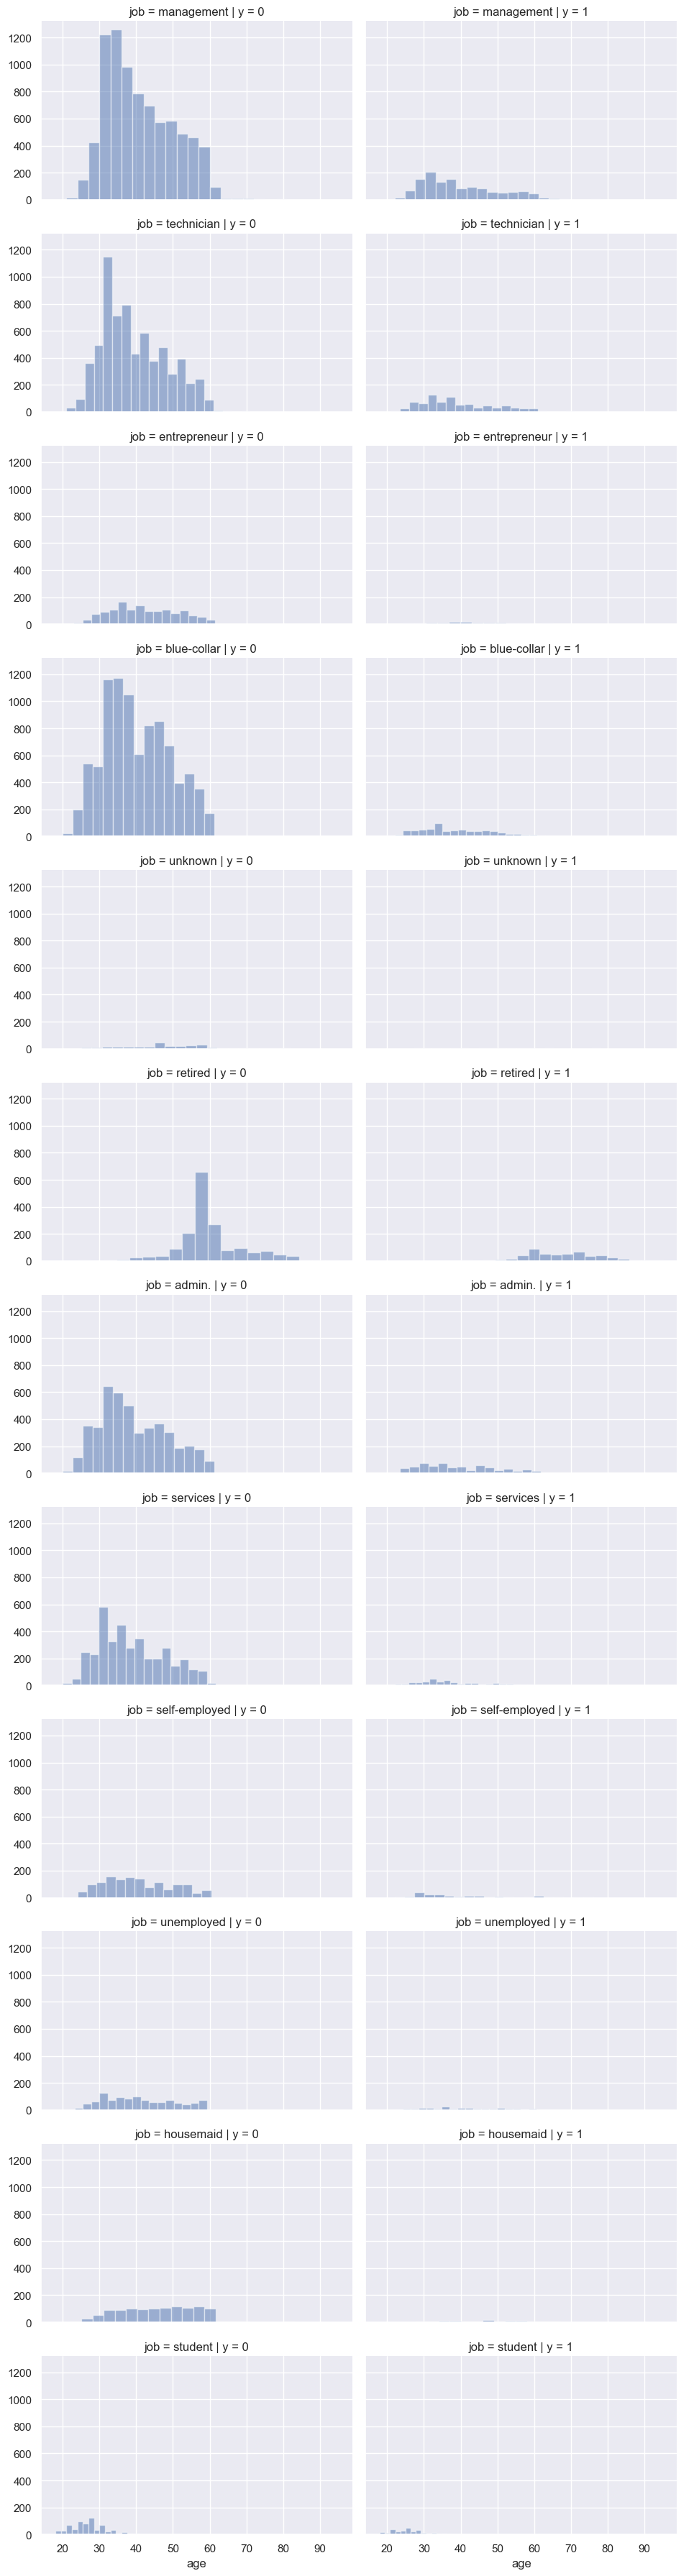

In [80]:
grid = sns.FacetGrid(df, col='y', row='job',aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [82]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [84]:
df["job"]= df.job.map({
    'management':1, 'technician':2, 'entrepreneur':3, 'blue-collar':4,
       'unknown':5, 'retired': 6,"admin.":7, 'services':8, 'self-employed':9,
       'unemployed':10, 'housemaid':11, 'student':12}).astype(int)

In [85]:
df.job.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### Marital Feature

In [86]:
pd.crosstab(df['marital'], df['y'], margins=True).style.background_gradient(axis=None
                                                              , low=0.75, high=1.0)

y,0,1,All
marital,,,
divorced,4585,622,5207
married,24459,2755,27214
single,10878,1912,12790
All,39922,5289,45211


Text(0.5, 1.0, 'Marital')

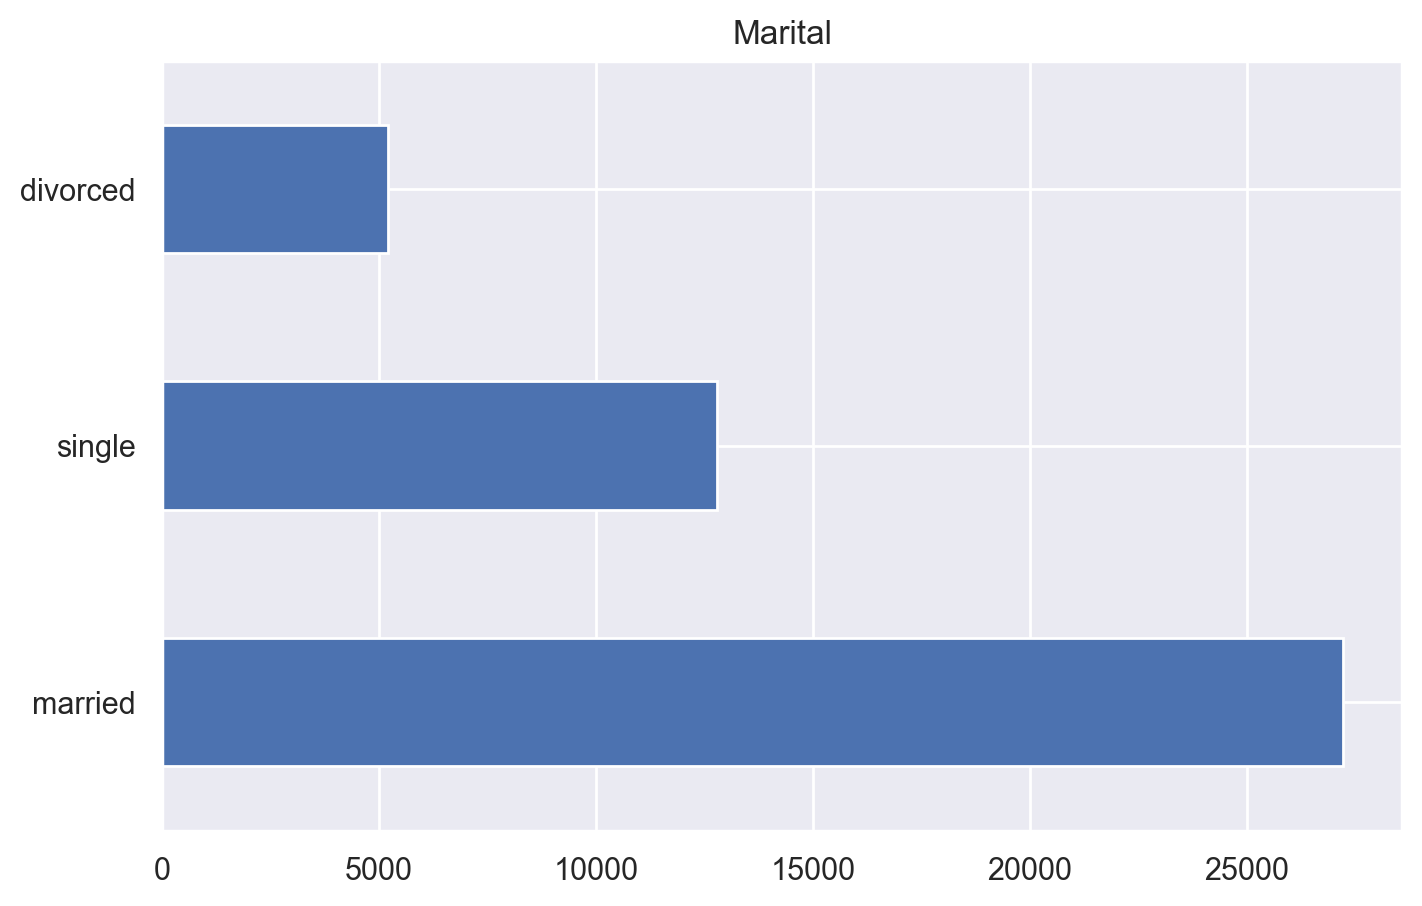

In [93]:
plt.figure(figsize=(8,5),dpi=200);
df["marital"].value_counts().plot(kind='barh')
plt.title("Marital")

### From the graph we can see that the married and yes-said cilents are more in the martial feature

In [98]:
df[['marital','y']].groupby('marital',as_index=False).mean().sort_values(by='y',ascending=True).style.background_gradient(
axis=None,low=0.75,high=1.0)

,marital,y
1,married,0.101235
0,divorced,0.119455
2,single,0.149492


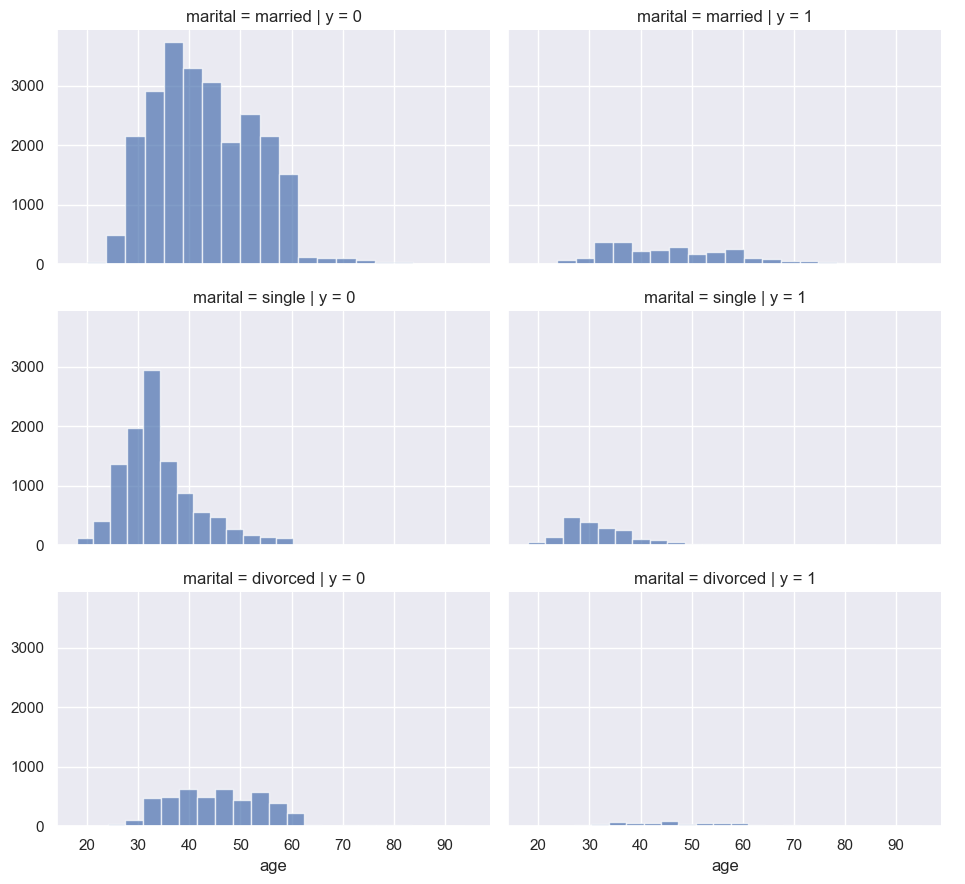

In [100]:
grid = sns.FacetGrid(df, col='y', row='marital',aspect=1.6)
grid.map(plt.hist, 'age',alpha=.7 ,bins=20)
grid.add_legend()

### From this subplot the married & yes- said clients have larger distribution on the subplots than the other categories in the feature

In [101]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [103]:
df["marital"]=df.marital.map({'married':1, 'single':2, 'divorced':3})

In [104]:
df.marital.unique()

array([1, 2, 3], dtype=int64)

### Age Feature

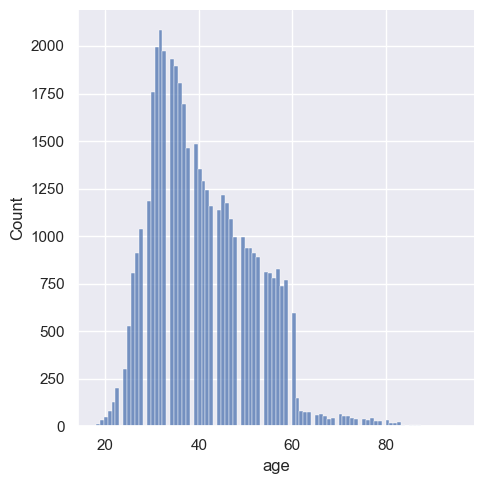

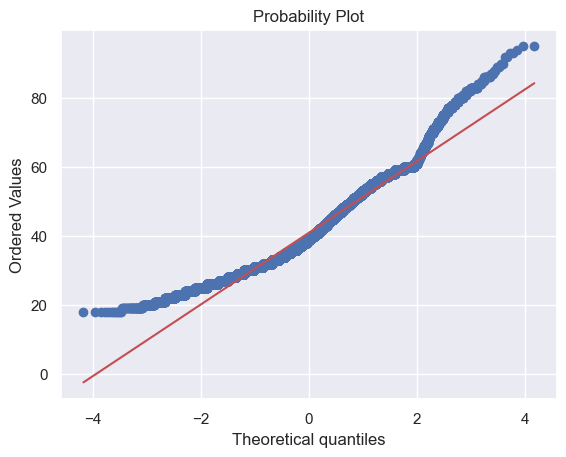

In [107]:
from scipy import stats
sns.displot(df["age"])
fig=plt.figure()
res=stats.probplot(df["age"],plot=plt)

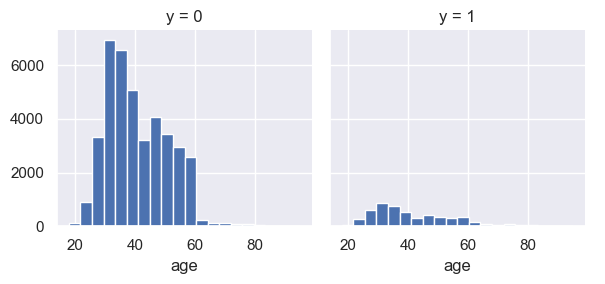

In [109]:
g = sns.FacetGrid(df, col='y')
g.map(plt.hist, 'age', bins=20)
g.add_legend()

C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


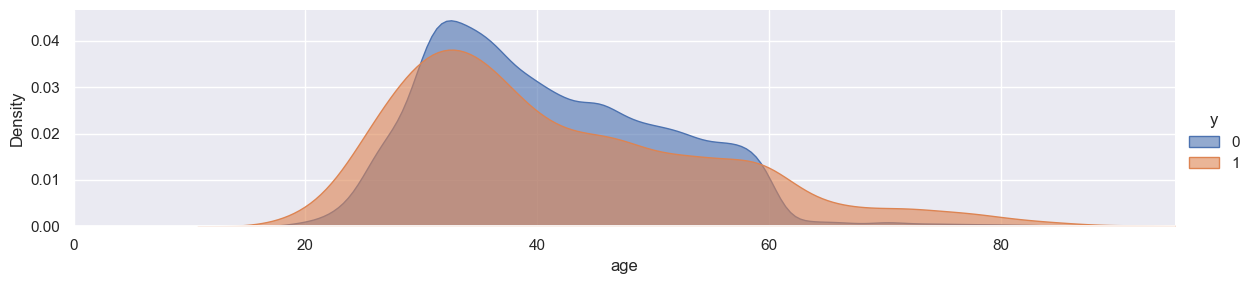

In [111]:
area = sns.FacetGrid(df, hue='y', aspect=4)
area.map(sns.kdeplot, 'age', shade=True, alpha=.6)
area.set(xlim=(0,df['age'].max()))
area.add_legend()

### Maximum yes said clients ranges from 20-50

In [114]:
df["age"].nlargest(5)

33699    95
41663    95
31233    94
44262    93
44420    93
Name: age, dtype: int64

In [115]:
df.corr().age.y

0.02515501708838736

In [117]:
df["age_range"]=pd.cut(df["age"],4)
df["age_range"]

0          (56.5, 75.75]
1          (37.25, 56.5]
2        (17.923, 37.25]
3          (37.25, 56.5]
4        (17.923, 37.25]
              ...       
45206      (37.25, 56.5]
45207      (56.5, 75.75]
45208      (56.5, 75.75]
45209      (56.5, 75.75]
45210    (17.923, 37.25]
Name: age_range, Length: 45211, dtype: category
Categories (4, interval[float64, right]): [(17.923, 37.25] < (37.25, 56.5] < (56.5, 75.75] < (75.75, 95.0]]

In [118]:
df["age_range"].unique()

[(56.5, 75.75], (37.25, 56.5], (17.923, 37.25], (75.75, 95.0]]
Categories (4, interval[float64, right]): [(17.923, 37.25] < (37.25, 56.5] < (56.5, 75.75] < (75.75, 95.0]]

In [122]:
df[['age_range','y']].groupby(['age_range'], as_index=False).mean().sort_values(by='age_range', ascending=True).style.background_gradient(axis=None,low=0.75,high=1.0)

,age_range,y
0,"(17.923, 37.25]",0.125141
1,"(37.25, 56.5]",0.091731
2,"(56.5, 75.75]",0.186739
3,"(75.75, 95.0]",0.448276


In [124]:
for col in [df]:
    col.loc[col["age"]<=17,"age"]=0
    col.loc[ (col['age'] > 17) & (col['age'] <= 60), 'age'] = 1
    col.loc[ (col['age'] > 60) & (col['age'] <= 80), 'age'] = 2
    col.loc[ (col['age'] > 80) , 'age'] = 3

In [125]:
df.corr().age.y

0.1516602935591435

### Deleting the age_range

In [126]:
df.drop(["age_range"],axis=1,inplace=True)

### Month Feature

<AxesSubplot: xlabel='mon', ylabel='count'>

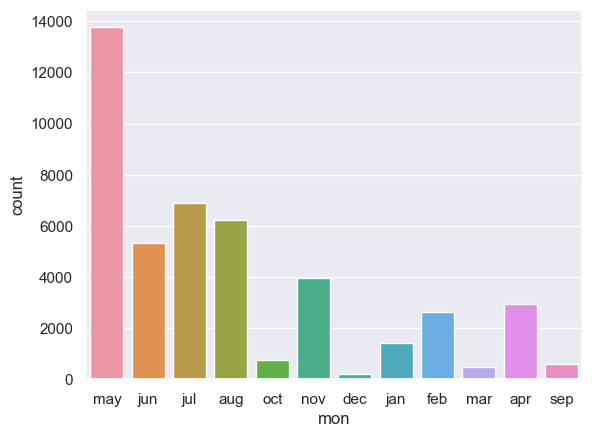

In [135]:
sns.countplot(x="mon",data=df)

<AxesSubplot: >

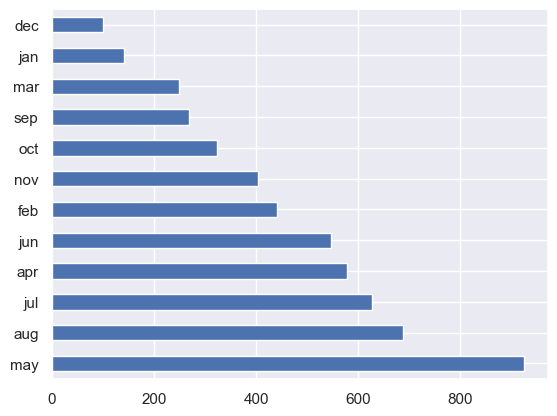

In [151]:
(df.mon[df.y ==1].value_counts()).plot(kind="barh",alpha=1,label="Yes")

<AxesSubplot: >

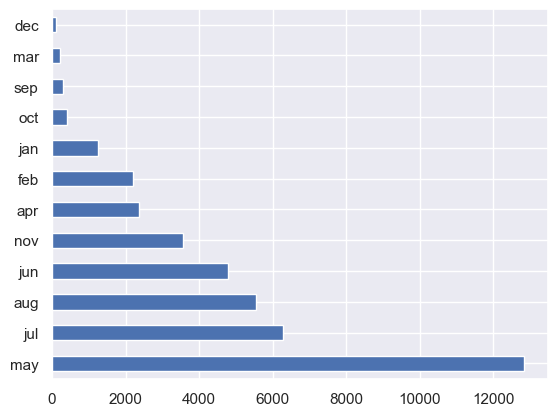

In [153]:
df.mon[df.y==0].value_counts().plot(kind="barh",alpha=1,label="Yes")

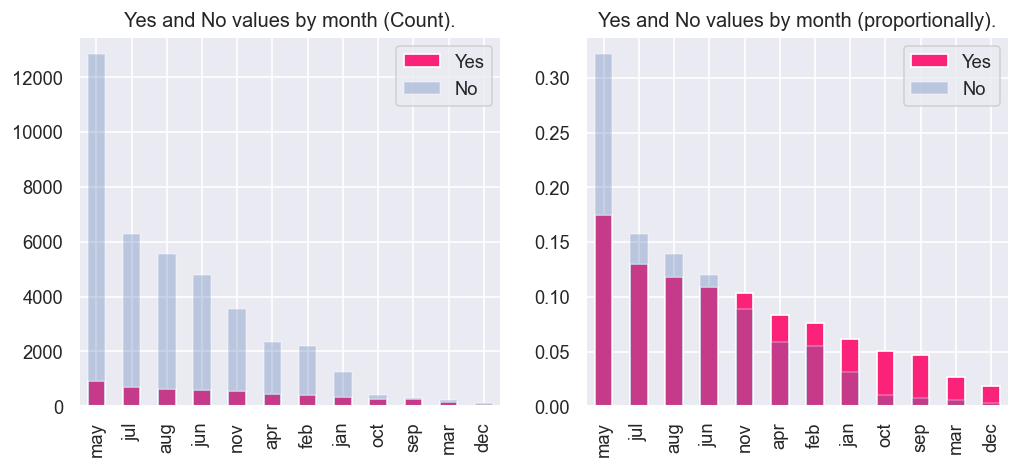

In [139]:
fig = plt.figure(figsize=(10,4), dpi =120)
ax1 = fig.add_subplot(121)
df.mon[df.y == 1].value_counts().plot(kind='bar', color='#FA2379',alpha=1, label='Yes')
df.mon[df.y == 0].value_counts().plot(kind='bar',alpha=.3, label='No')
plt.title("Yes and No values by month (Count)."); plt.legend(loc='best')

ax2 = fig.add_subplot(122)
(df.mon[df.y == 1].value_counts()/float(df.y[df.y == 1].size)).plot(kind='bar', color='#FA2379',alpha=1, label='Yes')
(df.mon[df.y == 0].value_counts()/float(df.y[df.y == 0].size)).plot(kind='bar',alpha=.3, label='No')
plt.title("Yes and No values by month (proportionally)."); plt.legend(loc='best')

In [155]:
df[['mon','y']].groupby(['mon'],as_index=False).mean().sort_values(by='y',ascending=False).style.background_gradient(axis=None,low=0.75,high=1.0)

,mon,y
7,mar,0.519916
2,dec,0.467290
11,sep,0.464594
10,oct,0.437669
0,apr,0.196794
3,feb,0.166478
1,aug,0.110133
6,jun,0.102228
9,nov,0.101511
4,jan,0.101212


In [156]:
pd.crosstab(df['mon'],df['y'],margins=True).style.background_gradient(axis=None,low=0.75,high=1.0)

y,0,1,All
mon,,,
apr,2355,577,2932
aug,5559,688,6247
dec,114,100,214
feb,2208,441,2649
jan,1261,142,1403
jul,6268,627,6895
jun,4795,546,5341
mar,229,248,477
may,12841,925,13766


In [157]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [158]:
df["mon"]= df.mon.map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2,
       'mar':3, 'apr':4, 'sep':8})

In [159]:
df.mon.unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4], dtype=int64)

### Education_qual Feature

In [160]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'job:admin.',
       'job:blue-collar', 'job:entrepreneur', 'job:housemaid',
       'job:management', 'job:retired', 'job:self-employed', 'job:services',
       'job:student', 'job:technician', 'job:unemployed', 'job:unknown',
       'marital:divorced', 'marital:married', 'marital:single',
       'education_qual:primary', 'education_qual:secondary',
       'education_qual:tertiary', 'education_qual:unknown',
       'call_type:cellular', 'call_type:telephone', 'call_type:unknown',
       'mon:apr', 'mon:aug', 'mon:dec', 'mon:feb', 'mon:jan', 'mon:jul',
       'mon:jun', 'mon:mar', 'mon:may', 'mon:nov', 'mon:oct', 'mon:sep',
       'marital:failure', 'marital:other', 'marital:success',
       'marital:unknown'],
      dtype='object')

In [164]:
df[["education_qual","y"]].groupby('education_qual',as_index=True).mean().sort_values(by='y',ascending=False).style.background_gradient(axis=None,low=0.75,high=1.0)

,y
education_qual,
tertiary,0.150064
unknown,0.135703
secondary,0.105594
primary,0.086265


<AxesSubplot: xlabel='education_qual', ylabel='count'>

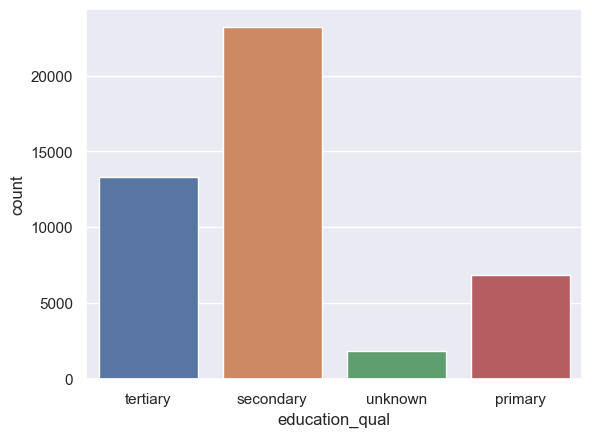

In [166]:
sns.countplot(data=df,x="education_qual",label="Yes")

In [169]:
pd.crosstab(df["education_qual"],df['y'],margins=True).style.background_gradient(axis=None,low=0.745,high=1.0)

y,0,1,All
education_qual,,,
primary,6260,591,6851
secondary,20752,2450,23202
tertiary,11305,1996,13301
unknown,1605,252,1857
All,39922,5289,45211


In [172]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [175]:
df["education_qual"]= df.education_qual.map({'tertiary':3, 'secondary':2, 'unknown':4, 'primary':1})

In [176]:
df.education_qual.unique()

array([3, 2, 4, 1], dtype=int64)

In [180]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'job:admin.',
       'job:blue-collar', 'job:entrepreneur', 'job:housemaid',
       'job:management', 'job:retired', 'job:self-employed', 'job:services',
       'job:student', 'job:technician', 'job:unemployed', 'job:unknown',
       'marital:divorced', 'marital:married', 'marital:single',
       'education_qual:primary', 'education_qual:secondary',
       'education_qual:tertiary', 'education_qual:unknown',
       'call_type:cellular', 'call_type:telephone', 'call_type:unknown',
       'mon:apr', 'mon:aug', 'mon:dec', 'mon:feb', 'mon:jan', 'mon:jul',
       'mon:jun', 'mon:mar', 'mon:may', 'mon:nov', 'mon:oct', 'mon:sep',
       'marital:failure', 'marital:other', 'marital:success',
       'marital:unknown'],
      dtype='object')

### Prev_outcome Feature

In [196]:
df[['prev_outcome','y']].groupby('prev_outcome', as_index=True).mean().sort_values(by='y', ascending=False)

,y
prev_outcome,
success,0.647253
other,0.166848
failure,0.126097
unknown,0.091615


In [185]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [197]:
pd.crosstab(df["prev_outcome"],df['y'],margins=True).style.background_gradient(axis=None,low=0.745,high=1.0)

y,0,1,All
prev_outcome,,,
failure,4283,618,4901
other,1533,307,1840
success,533,978,1511
unknown,33573,3386,36959
All,39922,5289,45211


<AxesSubplot: xlabel='prev_outcome', ylabel='count'>

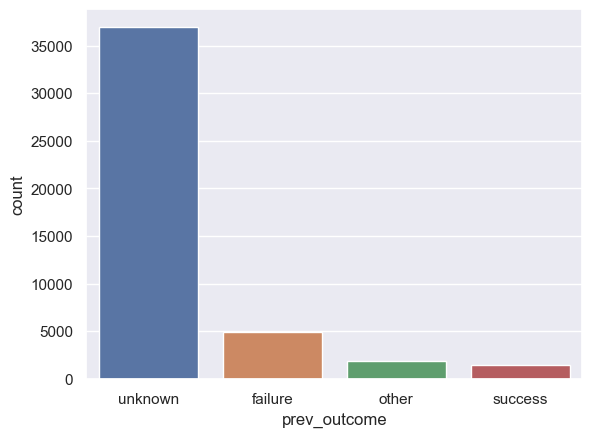

In [186]:
sns.countplot(data=df,x="prev_outcome",label="Yes")

In [199]:
df.drop(['prev_outcome'], axis=1, inplace=True)

### Call_type feature

In [202]:
df[['call_type','y']].groupby('call_type', as_index=True).mean().sort_values(by='y', ascending=False)

,y
call_type,
cellular,0.149189
telephone,0.134205
unknown,0.040707


<AxesSubplot: xlabel='call_type', ylabel='count'>

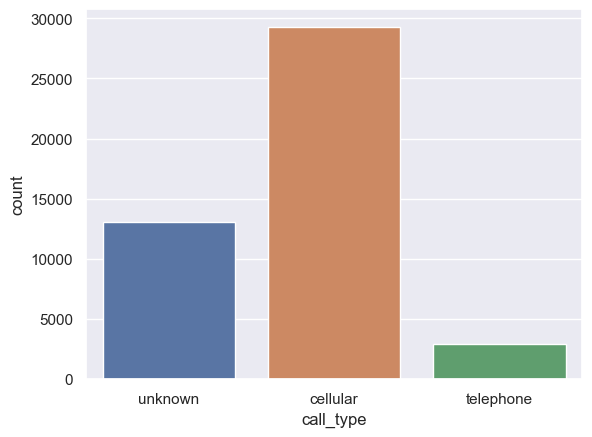

In [205]:
sns.countplot(data=df,x="call_type",label="Yes")

In [207]:
df['call_type'] = df.call_type.map({'telephone': 1, 'cellular': 2, 'unknown': 3})

In [208]:
df.call_type.unique()

array([3, 2, 1], dtype=int64)

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 


### Data Scaling

In [209]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,y,...,mon:jun,mon:mar,mon:may,mon:nov,mon:oct,mon:sep,marital:failure,marital:other,marital:success,marital:unknown
0,1,1,1,3,3,5,5,261,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,2,2,2,3,5,5,151,1,0,...,0,0,1,0,0,0,0,0,0,1
2,1,3,1,2,3,5,5,76,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,4,1,4,3,5,5,92,1,0,...,0,0,1,0,0,0,0,0,0,1
4,1,5,2,4,3,5,5,198,1,0,...,0,0,1,0,0,0,0,0,0,1


In [210]:
df1 = df.copy()
df1.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,y,...,mon:jun,mon:mar,mon:may,mon:nov,mon:oct,mon:sep,marital:failure,marital:other,marital:success,marital:unknown
0,1,1,1,3,3,5,5,261,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,2,2,2,3,5,5,151,1,0,...,0,0,1,0,0,0,0,0,0,1
2,1,3,1,2,3,5,5,76,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1,4,1,4,3,5,5,92,1,0,...,0,0,1,0,0,0,0,0,0,1
4,1,5,2,4,3,5,5,198,1,0,...,0,0,1,0,0,0,0,0,0,1


In [211]:
train_data = df1.iloc[:round(df.shape[0]*0.85,), :]
test_data = df1.iloc[train_data.shape[0]:, :]

In [214]:
train_data.shape

(38429, 48)

In [215]:
test_data.shape

(6782, 48)

In [216]:
X = train_data.iloc[:, :15]
y = train_data.iloc[:, -1]

Xt = test_data.iloc[:, :15]
yt = test_data.iloc[:, -1]

### Data Spliting

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)

### Using LogisticRegression Model

In [218]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33, max_iter=1000)
LogisticRegressionModel.fit(X_train, y_train)

print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))

print('LogisticRegressionModel T Score is : ' , LogisticRegressionModel.score(Xt, yt))

print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
print('----------------------------------------------------')


LogisticRegressionModel Train Score is :  0.874560649847692
LogisticRegressionModel Test Score is :  1.0
LogisticRegressionModel T Score is :  0.49365968740784427
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [1000]
----------------------------------------------------


C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### LogisticRegression model value prediction

In [219]:
y_pred = LogisticRegressionModel.predict(X_test)
yt_pred_lr = LogisticRegressionModel.predict(Xt)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [1 1 1 1 1 1 1 1 1 1]
Prediction Probabilities Value for LogisticRegressionModel is :  [[0.07679257 0.92320743]
 [0.16084008 0.83915992]
 [0.19419512 0.80580488]
 [0.11984263 0.88015737]
 [0.12439113 0.87560887]
 [0.09855838 0.90144162]
 [0.12325632 0.87674368]
 [0.12392461 0.87607539]
 [0.08011245 0.91988755]
 [0.11656288 0.88343712]]


In [222]:
coeff_df = pd.DataFrame(train_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(LogisticRegressionModel.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
4,day,0.255296
6,dur,0.133087
8,y,0.123227
5,mon,0.017544
1,marital,0.009547
13,job:management,0.006775
0,job,0.006405
14,job:retired,0.004682
3,call_type,0.000157
7,num_calls,0.000149


### SVC Model

In [226]:
SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed, rbf
               max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(X_train, y_train)

print('----------------------------------------------------')
print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))

print('SVCModel T Score is : ' , SVCModel.score(Xt, yt))

print('----------------------------------------------------')

C:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


----------------------------------------------------
SVCModel Train Score is :  0.8693535369314483
SVCModel Test Score is :  1.0
SVCModel T Score is :  0.495576526098496
----------------------------------------------------


### Calculating prediction

In [227]:
y_pred = SVCModel.predict(X_test)
yt_pred_svc = SVCModel.predict(Xt)
print('Predicted Value for SVCModel is : ' , y_pred[:10])

Predicted Value for SVCModel is :  [1 1 1 1 1 1 1 1 1 1]
